In [11]:
#author 
"shreyas raja created @time using LSTM - Sequence modelling"
import numpy as np
import pandas as pd #to load the data 
import matplotlib as mpl # to plot figures 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression # doen initially to eliminate the NAns from the dataset 
from sklearn.model_selection import train_test_split #to split the data into training and testing   
from keras.preprocessing.sequence import TimeseriesGenerator # data processing for time series generator 
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to convert the data fro float to a vector (one hot encoding)
from keras import metrics 
import tensorflow as tf # to describe the architecture of the neural networks 
from keras.layers import Masking
import seaborn as sns

mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['axes.grid'] = False

In [12]:
df=pd.read_csv('try_this_new.csv')
df['ET'] = pd.to_numeric(df['ET'],errors = 'coerce')
#df = df.astype('datetime64[nt]')
#df = df.fillna(method='ffill')
#df= df.interpolate('linear')
df
df["date"] = pd.to_datetime(df["date"])
#df.head(10)
df.set_index('date',inplace=True)
#df = df.resample('W').mean()
df= df.interpolate('linear')
#df=df.iloc[4:313,:]
df

,R_H,Precipitation,Eto,ET,HK4004U,HK4256U,Infiltration(l/min)
date,,,,,,,
2018-09-04,89,0.0,1.71,1.702555,19.595000,26.245000,0.000000
2018-09-05,83,0.0,1.80,1.875992,19.570000,26.210000,0.000000
2018-09-06,87,0.0,2.29,2.310219,19.560000,26.190000,0.000000
2018-09-07,78,14.9,1.92,1.881792,19.550000,26.190000,0.000000
2018-09-08,85,9.1,1.90,1.990931,19.780000,26.270000,0.000000
...,...,...,...,...,...,...,...
2020-06-26,72,1.0,5.48,2.041947,19.374400,22.294167,11.866667
2020-06-27,73,6.5,5.60,2.279866,19.362083,22.328750,11.800000
2020-06-28,82,2.5,2.57,1.222635,19.596667,22.329583,11.716667


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 666 entries, 2018-09-04 to 2020-06-30
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   R_H                  666 non-null    int64  
 1   Precipitation        666 non-null    float64
 2   Eto                  666 non-null    float64
 3   ET                   666 non-null    float64
 4   HK4004U              666 non-null    float64
 5   HK4256U              666 non-null    float64
 6   Infiltration(l/min)  666 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 41.6 KB


In [14]:
#df=df.interpolate('linear')
df= df.fillna({'ET':0})
#df=df.loc[25:2181,:]
df

,R_H,Precipitation,Eto,ET,HK4004U,HK4256U,Infiltration(l/min)
date,,,,,,,
2018-09-04,89,0.0,1.71,1.702555,19.595000,26.245000,0.000000
2018-09-05,83,0.0,1.80,1.875992,19.570000,26.210000,0.000000
2018-09-06,87,0.0,2.29,2.310219,19.560000,26.190000,0.000000
2018-09-07,78,14.9,1.92,1.881792,19.550000,26.190000,0.000000
2018-09-08,85,9.1,1.90,1.990931,19.780000,26.270000,0.000000
...,...,...,...,...,...,...,...
2020-06-26,72,1.0,5.48,2.041947,19.374400,22.294167,11.866667
2020-06-27,73,6.5,5.60,2.279866,19.362083,22.328750,11.800000
2020-06-28,82,2.5,2.57,1.222635,19.596667,22.329583,11.716667


In [15]:
#df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df['ET'] = pd.to_numeric(df['ET'],errors = 'coerce')
df['R_H']=df['R_H'].astype(float)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 666 entries, 2018-09-04 to 2020-06-30
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   R_H                  666 non-null    float64
 1   Precipitation        666 non-null    float64
 2   Eto                  666 non-null    float64
 3   ET                   666 non-null    float64
 4   HK4004U              666 non-null    float64
 5   HK4256U              666 non-null    float64
 6   Infiltration(l/min)  666 non-null    float64
dtypes: float64(7)
memory usage: 41.6 KB


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

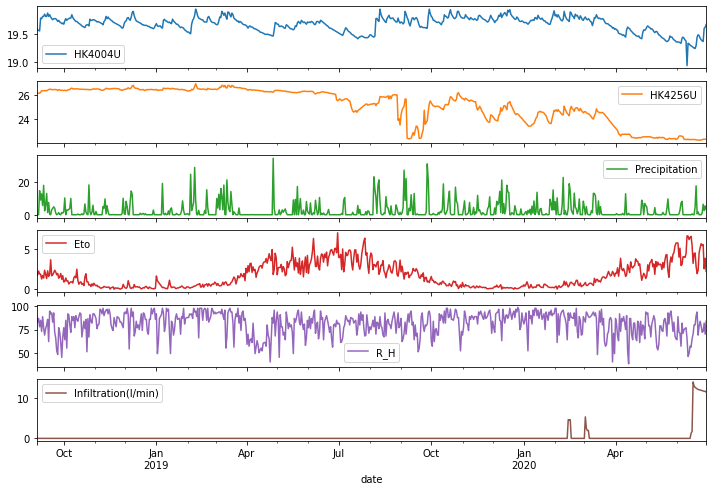

In [17]:
df[['HK4004U','HK4256U','Precipitation','Eto','R_H','Infiltration(l/min)']].plot(subplots=True)

array([[<AxesSubplot:title={'center':'R_H'}>,
        <AxesSubplot:title={'center':'Precipitation'}>,
        <AxesSubplot:title={'center':'Eto'}>],
       [<AxesSubplot:title={'center':'ET'}>,
        <AxesSubplot:title={'center':'HK4004U'}>,
        <AxesSubplot:title={'center':'HK4256U'}>],
       [<AxesSubplot:title={'center':'Infiltration(l/min)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

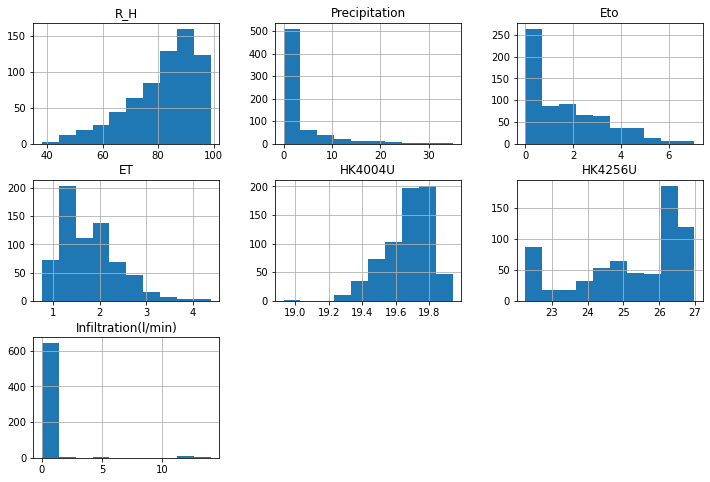

In [59]:
df.hist()

In [18]:
df_input =df[['HK4256U','Precipitation','Eto','R_H','Infiltration(l/min)']]
#df_input= df.fillna({'ET':0})
df_input

,HK4256U,Precipitation,Eto,R_H,Infiltration(l/min)
date,,,,,
2018-09-04,26.245000,0.0,1.71,89.0,0.000000
2018-09-05,26.210000,0.0,1.80,83.0,0.000000
2018-09-06,26.190000,0.0,2.29,87.0,0.000000
2018-09-07,26.190000,14.9,1.92,78.0,0.000000
2018-09-08,26.270000,9.1,1.90,85.0,0.000000
...,...,...,...,...,...
2020-06-26,22.294167,1.0,5.48,72.0,11.866667
2020-06-27,22.328750,6.5,5.60,73.0,11.800000
2020-06-28,22.329583,2.5,2.57,82.0,11.716667


In [19]:
df_input
df_input.describe()

,HK4256U,Precipitation,Eto,R_H,Infiltration(l/min)
count,666.000000,666.000000,666.000000,666.000000,666.000000
mean,25.195902,2.701502,1.723874,81.492492,0.300475
std,1.465715,5.110658,1.561828,12.345555,1.800838
min,22.251667,0.000000,0.010000,38.000000,0.000000
25%,24.325000,0.000000,0.400000,74.000000,0.000000
50%,25.705000,0.100000,1.185000,85.000000,0.000000
75%,26.480000,3.000000,2.795000,91.000000,0.000000
max,26.990000,35.000000,7.070000,99.000000,14.050000


array([[<AxesSubplot:title={'center':'HK4256U'}>,
        <AxesSubplot:title={'center':'Precipitation'}>],
       [<AxesSubplot:title={'center':'Eto'}>,
        <AxesSubplot:title={'center':'R_H'}>],
       [<AxesSubplot:title={'center':'Infiltration(l/min)'}>,
        <AxesSubplot:>]], dtype=object)

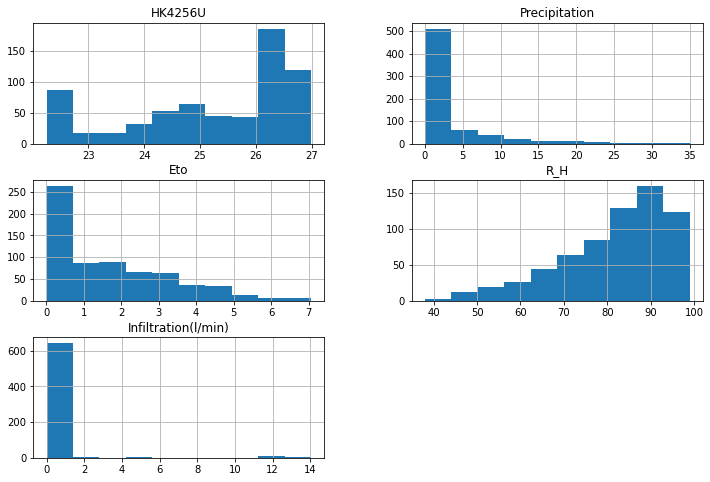

In [58]:

df_input.hist()

In [20]:
#df_input.query("Precipitation > 25")

In [21]:
 scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)


In [22]:
data_scaled

array([[0.84277172, 0.        , 0.2407932 , 0.83606557, 0.        ],
       [0.83538516, 0.        , 0.25354108, 0.73770492, 0.        ],
       [0.83116426, 0.        , 0.32294618, 0.80327869, 0.        ],
       ...,
       [0.0164439 , 0.07142857, 0.36260623, 0.72131148, 0.83392645],
       [0.0164439 , 0.15714286, 0.54957507, 0.52459016, 0.83155397],
       [0.0164439 , 0.09428571, 0.31728045, 0.75409836, 0.81969158]])

In [23]:
features=data_scaled [:,:]
target=data_scaled [:,0]

In [24]:
TimeseriesGenerator(features,target, length=2,sampling_rate=1, batch_size =1)[0]#length=2

(array([[[0.84277172, 0.        , 0.2407932 , 0.83606557, 0.        ],
         [0.83538516, 0.        , 0.25354108, 0.73770492, 0.        ]]]),
 array([0.83116426]))

In [25]:
features=data_scaled [:,:]
target=data_scaled [:,0]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.30,random_state=123,shuffle = False)
# shuffle = false , is important because it wont randomly shuffle with respect to time and training 80% of the data and not just 20%.

In [27]:
x_train.shape,x_test.shape

((466, 5), (200, 5))

In [28]:
win_length = 2
batch_size = 10
num_features = 5
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length

In [29]:
    train_generator[0]

(array([[[0.84277172, 0.        , 0.2407932 , 0.83606557, 0.        ],
         [0.83538516, 0.        , 0.25354108, 0.73770492, 0.        ]],
 
        [[0.83538516, 0.        , 0.25354108, 0.73770492, 0.        ],
         [0.83116426, 0.        , 0.32294618, 0.80327869, 0.        ]],
 
        [[0.83116426, 0.        , 0.32294618, 0.80327869, 0.        ],
         [0.83116426, 0.42571429, 0.27053824, 0.6557377 , 0.        ]],
 
        [[0.83116426, 0.42571429, 0.27053824, 0.6557377 , 0.        ],
         [0.84804784, 0.26      , 0.26770538, 0.7704918 , 0.        ]],
 
        [[0.84804784, 0.26      , 0.26770538, 0.7704918 , 0.        ],
         [0.8733732 , 0.36857143, 0.18271955, 0.57377049, 0.        ]],
 
        [[0.8733732 , 0.36857143, 0.18271955, 0.57377049, 0.        ],
         [0.87548364, 0.16285714, 0.24362606, 0.83606557, 0.        ]],
 
        [[0.87548364, 0.16285714, 0.24362606, 0.83606557, 0.        ],
         [0.87548364, 0.52      , 0.19830028, 0.63934426, 0

In [30]:
test_generator[0]
                            

(array([[[0.58213155, 0.10285714, 0.02266289, 0.85245902, 0.        ],
         [0.53992262, 0.52285714, 0.02832861, 0.86885246, 0.        ]],
 
        [[0.53992262, 0.52285714, 0.02832861, 0.86885246, 0.        ],
         [0.65599719, 0.40571429, 0.03116147, 0.80327869, 0.        ]],
 
        [[0.65599719, 0.40571429, 0.03116147, 0.80327869, 0.        ],
         [0.66232853, 0.39428571, 0.01983003, 0.85245902, 0.        ]],
 
        [[0.66232853, 0.39428571, 0.01983003, 0.85245902, 0.        ],
         [0.68343299, 0.        , 0.02549575, 0.98360656, 0.        ]],
 
        [[0.68343299, 0.        , 0.02549575, 0.98360656, 0.        ],
         [0.62434049, 0.        , 0.02832861, 0.8852459 , 0.        ]],
 
        [[0.62434049, 0.        , 0.02832861, 0.8852459 , 0.        ],
         [0.59268378, 0.03714286, 0.02266289, 0.78688525, 0.        ]],
 
        [[0.59268378, 0.03714286, 0.02266289, 0.78688525, 0.        ],
         [0.5525853 , 0.02      , 0.01558074, 0.8852459 , 0

In [79]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32,input_shape=(win_length,num_features),return_sequences=True)) # return seq, hidden state for all the input sequence. To take each observatuion into account and hence return sequence is true  
model.add(tf.keras.layers.LeakyReLU(alpha=0.02))
model.add(tf.keras.layers.LSTM(32,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.02))
#model.add(tf.keras.layers.LSTM(512,return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=2))
model.add(tf.keras.layers.Dropout(0.3))# to make
model.add(tf.keras.layers.LSTM(16,return_sequences=False)) #returns only one hidden state back
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2, 32)             4864      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2, 32)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 2, 32)             8320      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 2, 32)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 32)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)               

In [81]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience=2,mode='min')
    
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=50,validation_data =test_generator,
                             shuffle=False)# callbacks = [early_stopping])

Epoch 1/50
47/47 [==============================] - 6s 120ms/step - loss: 0.5077 - mean_absolute_error: 0.6689 - val_loss: 0.0431 - val_mean_absolute_error: 0.1928
Epoch 2/50
47/47 [==============================] - 1s 11ms/step - loss: 0.1319 - mean_absolute_error: 0.3055 - val_loss: 0.0923 - val_mean_absolute_error: 0.2453
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0769 - mean_absolute_error: 0.2265 - val_loss: 0.1059 - val_mean_absolute_error: 0.2739
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0639 - mean_absolute_error: 0.2074 - val_loss: 0.1219 - val_mean_absolute_error: 0.3060
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0625 - mean_absolute_error: 0.2012 - val_loss: 0.1094 - val_mean_absolute_error: 0.2889
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0586 - mean_absolute_error: 0.1962 - val_loss: 0.0985 - val_mean_absolute_error: 0.2741
Epoch 7/50
47/47 [=======

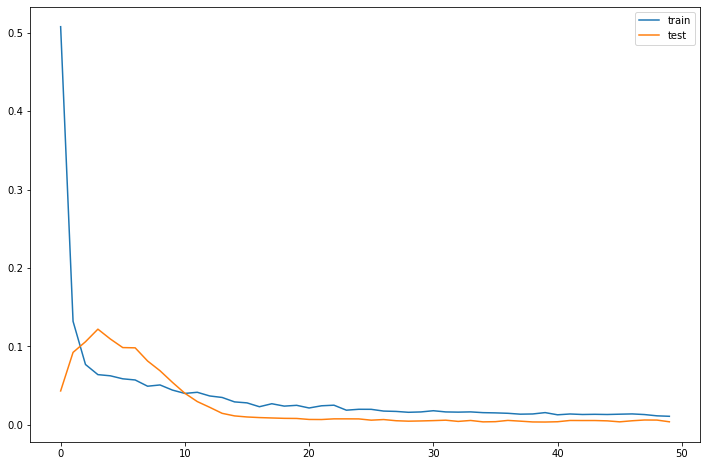

In [82]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [83]:
#model.evaluate_generator(train_generator,verbose=0)
model.evaluate_generator(test_generator,verbose=0)

[0.0038030038122087717, 0.03687044233083725]

In [84]:

predictions=model.predict_generator(test_generator) # we can use train generator also to check predictions for the training set. 

In [85]:
predictions.shape[0]

198

In [86]:
predictions


array([[0.57857424],
       [0.64993095],
       [0.6995865 ],
       [0.65868336],
       [0.5790762 ],
       [0.5472296 ],
       [0.5260211 ],
       [0.48051462],
       [0.4626614 ],
       [0.4613385 ],
       [0.42968947],
       [0.4237458 ],
       [0.41300726],
       [0.40465793],
       [0.4158525 ],
       [0.40662354],
       [0.3679393 ],
       [0.35899577],
       [0.34415188],
       [0.34100857],
       [0.31077117],
       [0.26391926],
       [0.26722947],
       [0.2876159 ],
       [0.28171235],
       [0.27995676],
       [0.32343245],
       [0.3405004 ],
       [0.36801568],
       [0.36273533],
       [0.42202008],
       [0.4726119 ],
       [0.4441141 ],
       [0.46306476],
       [0.4751501 ],
       [0.45743814],
       [0.4519547 ],
       [0.44102186],
       [0.42705536],
       [0.42781645],
       [0.39089215],
       [0.36309007],
       [0.34287736],
       [0.35266826],
       [0.3800767 ],
       [0.37478578],
       [0.44528732],
       [0.515

In [87]:
y_test


array([0.58213155, 0.53992262, 0.65599719, 0.66232853, 0.68343299,
       0.62434049, 0.59268378, 0.5525853 , 0.5167077 , 0.47660922,
       0.4533943 , 0.46816743, 0.46183609, 0.44495251, 0.41962715,
       0.40063313, 0.38586001, 0.36053465, 0.34154063, 0.32254661,
       0.30566303, 0.28244812, 0.2592332 , 0.24657052, 0.25079142,
       0.24868097, 0.27295111, 0.28244812, 0.2951108 , 0.34154063,
       0.39113612, 0.40696447, 0.49243757, 0.49876891, 0.51248681,
       0.49560324, 0.49982413, 0.49138234, 0.47871966, 0.45550475,
       0.43228983, 0.38374956, 0.33520929, 0.30988392, 0.2951108 ,
       0.2951108 , 0.38163911, 0.45550475, 0.52937038, 0.5167077 ,
       0.53781217, 0.50826592, 0.54203306, 0.51248681, 0.49771368,
       0.47027788, 0.44917341, 0.44706296, 0.60323602, 0.54625396,
       0.50826592, 0.47238832, 0.45550475, 0.43440028, 0.5483644 ,
       0.59901512, 0.55891664, 0.53992262, 0.51037636, 0.56524798,
       0.56946887, 0.57580021, 0.53992262, 0.51881815, 0.56102

In [88]:
    x_test

array([[0.58213155, 0.10285714, 0.02266289, 0.85245902, 0.        ],
       [0.53992262, 0.52285714, 0.02832861, 0.86885246, 0.        ],
       [0.65599719, 0.40571429, 0.03116147, 0.80327869, 0.        ],
       [0.66232853, 0.39428571, 0.01983003, 0.85245902, 0.        ],
       [0.68343299, 0.        , 0.02549575, 0.98360656, 0.        ],
       [0.62434049, 0.        , 0.02832861, 0.8852459 , 0.        ],
       [0.59268378, 0.03714286, 0.02266289, 0.78688525, 0.        ],
       [0.5525853 , 0.02      , 0.01558074, 0.8852459 , 0.        ],
       [0.5167077 , 0.        , 0.00141643, 0.93442623, 0.        ],
       [0.47660922, 0.16      , 0.02832861, 0.81967213, 0.        ],
       [0.4533943 , 0.08285714, 0.01274788, 0.96721311, 0.        ],
       [0.46816743, 0.00285714, 0.01274788, 0.91803279, 0.        ],
       [0.46183609, 0.        , 0.01133144, 1.        , 0.        ],
       [0.44495251, 0.00285714, 0.01983003, 0.95081967, 0.        ],
       [0.41962715, 0.        , 0.

In [89]:
 x_test[:,0:][win_length:]

array([[0.65599719, 0.40571429, 0.03116147, 0.80327869, 0.        ],
       [0.66232853, 0.39428571, 0.01983003, 0.85245902, 0.        ],
       [0.68343299, 0.        , 0.02549575, 0.98360656, 0.        ],
       [0.62434049, 0.        , 0.02832861, 0.8852459 , 0.        ],
       [0.59268378, 0.03714286, 0.02266289, 0.78688525, 0.        ],
       [0.5525853 , 0.02      , 0.01558074, 0.8852459 , 0.        ],
       [0.5167077 , 0.        , 0.00141643, 0.93442623, 0.        ],
       [0.47660922, 0.16      , 0.02832861, 0.81967213, 0.        ],
       [0.4533943 , 0.08285714, 0.01274788, 0.96721311, 0.        ],
       [0.46816743, 0.00285714, 0.01274788, 0.91803279, 0.        ],
       [0.46183609, 0.        , 0.01133144, 1.        , 0.        ],
       [0.44495251, 0.00285714, 0.01983003, 0.95081967, 0.        ],
       [0.41962715, 0.        , 0.02832861, 0.60655738, 0.        ],
       [0.40063313, 0.10285714, 0.04249292, 0.6557377 , 0.        ],
       [0.38586001, 0.00285714, 0.

In [90]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [91]:
df_pred

,0,0,1,2,3
0,0.578574,0.405714,0.031161,0.803279,0.000000
1,0.649931,0.394286,0.019830,0.852459,0.000000
2,0.699587,0.000000,0.025496,0.983607,0.000000
3,0.658683,0.000000,0.028329,0.885246,0.000000
4,0.579076,0.037143,0.022663,0.786885,0.000000
...,...,...,...,...,...
193,0.176580,0.028571,0.774788,0.557377,0.844603
194,0.173182,0.185714,0.791785,0.573770,0.839858
195,0.188770,0.071429,0.362606,0.721311,0.833926
196,0.207252,0.157143,0.549575,0.524590,0.831554


In [92]:
rev_trans=scaler.inverse_transform(df_pred)

In [93]:
df_pred

,0,0,1,2,3
0,0.578574,0.405714,0.031161,0.803279,0.000000
1,0.649931,0.394286,0.019830,0.852459,0.000000
2,0.699587,0.000000,0.025496,0.983607,0.000000
3,0.658683,0.000000,0.028329,0.885246,0.000000
4,0.579076,0.037143,0.022663,0.786885,0.000000
...,...,...,...,...,...
193,0.176580,0.028571,0.774788,0.557377,0.844603
194,0.173182,0.185714,0.791785,0.573770,0.839858
195,0.188770,0.071429,0.362606,0.721311,0.833926
196,0.207252,0.157143,0.549575,0.524590,0.831554


In [94]:
rev_trans

array([[2.49931443e+01, 1.42000000e+01, 2.30000000e-01, 8.70000000e+01,
        0.00000000e+00],
       [2.53312562e+01, 1.38000000e+01, 1.50000000e-01, 9.00000000e+01,
        0.00000000e+00],
       [2.55665408e+01, 0.00000000e+00, 1.90000000e-01, 9.80000000e+01,
        0.00000000e+00],
       [2.53727280e+01, 0.00000000e+00, 2.10000000e-01, 9.20000000e+01,
        0.00000000e+00],
       [2.49955226e+01, 1.30000000e+00, 1.70000000e-01, 8.60000000e+01,
        0.00000000e+00],
       [2.48446229e+01, 7.00000000e-01, 1.20000000e-01, 9.20000000e+01,
        0.00000000e+00],
       [2.47441301e+01, 0.00000000e+00, 2.00000000e-02, 9.50000000e+01,
        0.00000000e+00],
       [2.45285051e+01, 5.60000000e+00, 2.10000000e-01, 8.80000000e+01,
        0.00000000e+00],
       [2.44439105e+01, 2.90000000e+00, 1.00000000e-01, 9.70000000e+01,
        0.00000000e+00],
       [2.44376422e+01, 1.00000000e-01, 1.00000000e-01, 9.40000000e+01,
        0.00000000e+00],
       [2.42876786e+01, 0.0000

In [95]:
df_final1=rev_trans[:,:]
df_final1

array([[2.49931443e+01, 1.42000000e+01, 2.30000000e-01, 8.70000000e+01,
        0.00000000e+00],
       [2.53312562e+01, 1.38000000e+01, 1.50000000e-01, 9.00000000e+01,
        0.00000000e+00],
       [2.55665408e+01, 0.00000000e+00, 1.90000000e-01, 9.80000000e+01,
        0.00000000e+00],
       [2.53727280e+01, 0.00000000e+00, 2.10000000e-01, 9.20000000e+01,
        0.00000000e+00],
       [2.49955226e+01, 1.30000000e+00, 1.70000000e-01, 8.60000000e+01,
        0.00000000e+00],
       [2.48446229e+01, 7.00000000e-01, 1.20000000e-01, 9.20000000e+01,
        0.00000000e+00],
       [2.47441301e+01, 0.00000000e+00, 2.00000000e-02, 9.50000000e+01,
        0.00000000e+00],
       [2.45285051e+01, 5.60000000e+00, 2.10000000e-01, 8.80000000e+01,
        0.00000000e+00],
       [2.44439105e+01, 2.90000000e+00, 1.00000000e-01, 9.70000000e+01,
        0.00000000e+00],
       [2.44376422e+01, 1.00000000e-01, 1.00000000e-01, 9.40000000e+01,
        0.00000000e+00],
       [2.42876786e+01, 0.0000

In [96]:
df_final=(df_input[predictions.shape[0]*-1:])

In [97]:
df_final.count()

HK4256U                198
Precipitation          198
Eto                    198
R_H                    198
Infiltration(l/min)    198
dtype: int64

In [99]:
df_final['HK4256U_pred']=rev_trans[:,0]


<ipython-input-99-644ce70a5e8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['HK4256U_pred']=rev_trans[:,0]


In [100]:
                df_final
#df_final.to_csv("Copythecsv.csv")

,HK4256U,Precipitation,Eto,R_H,Infiltration(l/min),HK4256U_pred
date,,,,,,
2019-12-16,25.360000,14.2,0.23,87.0,0.000000,24.993144
2019-12-17,25.390000,13.8,0.15,90.0,0.000000,25.331256
2019-12-18,25.490000,0.0,0.19,98.0,0.000000,25.566541
2019-12-19,25.210000,0.0,0.21,92.0,0.000000,25.372728
2019-12-20,25.060000,1.3,0.17,86.0,0.000000,24.995523
...,...,...,...,...,...,...
2020-06-26,22.294167,1.0,5.48,72.0,11.866667,23.088363
2020-06-27,22.328750,6.5,5.60,73.0,11.800000,23.072262
2020-06-28,22.329583,2.5,2.57,82.0,11.716667,23.146123


<AxesSubplot:xlabel='date'>

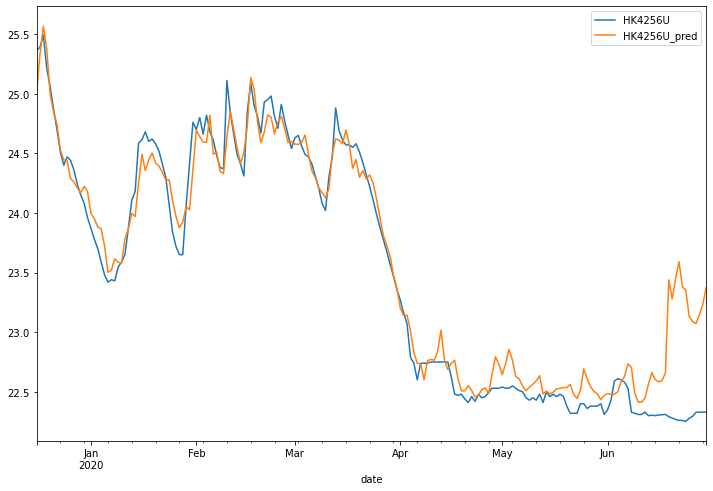

In [101]:
df_final[['HK4256U','HK4256U_pred']].plot()
#plt.savefig("HK4004U,HK4004U_pred")

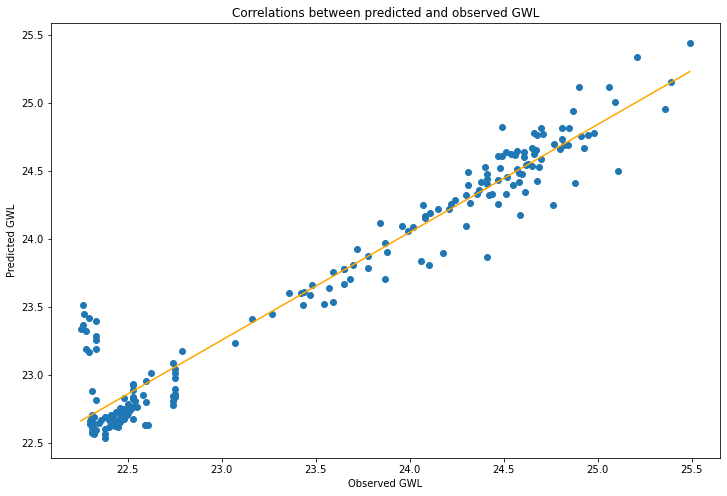

In [1814]:
x =df_final['HK4256U']
y= df_final['HK4256U_pred']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.title('Correlations between predicted and observed GWL')
plt.xlabel('Observed GWL')
plt.ylabel('Predicted GWL')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color="orange")
plt.show()

In [1815]:
x_values = df_final['HK4256U']
y_values = df_final['HK4256U_pred']
    
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9353825261140432


In [1816]:
    import os
    import random
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.ndimage import zoom
    from sklearn.preprocessing import StandardScaler

    import tensorflow as tf
    from tensorflow.keras.layers import *
    from tensorflow.keras.models import *
    from tensorflow.keras.callbacks import *
    from tensorflow.keras.optimizers import *
    from tensorflow.keras import backend as K
    #from kerashypetune import KerasGridSearch

    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()

In [1817]:
def gradient_importance(seq, model):
    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)
    with tf.GradientTape() as tape:
        predictions = model(seq)
    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads
def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap


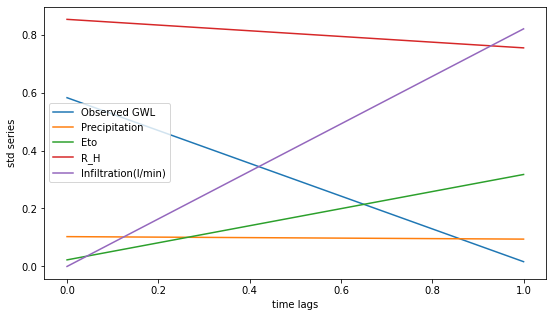

In [1818]:
id_ = [0,199]
plt.figure(figsize=(9,5))
plt.plot(x_test[id_])
plt.ylabel('std series'); plt.xlabel('time lags'); plt.legend(columns)
plt.show()

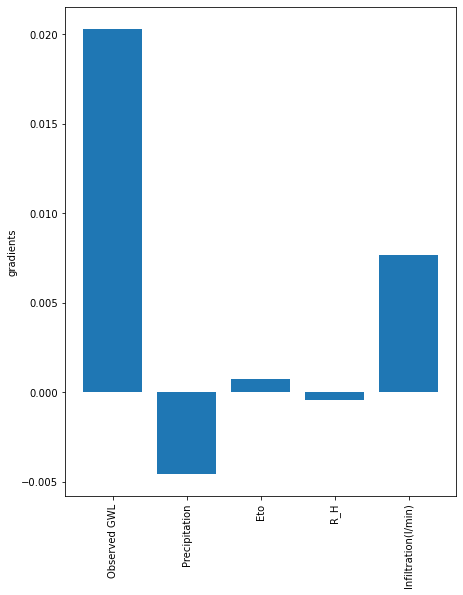

In [1819]:
columns = ['Observed GWL','Precipitation','Eto','R_H','Infiltration(l/min)']
#win_length = 1
#test_date = df[df.year== 2019].values
grad_imp = gradient_importance(x_test, model)

plt.figure(figsize=(7,9))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title((tes))
plt.show()